In [11]:
import numpy as np
import matplotlib.pyplot as plt

from vc_sample.density_estimation import KernelDensityEstimator, Kernel, epanechnikov, gaussian, kernel_scale_factor
from vc_sample.void_and_cluster import VoidAndCluster

In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
x_ = np.linspace(0., 1., 20)
y_ = np.linspace(0., 1., 20)

x, y = np.meshgrid(x_, y_, indexing='ij')
points = np.stack([x.flatten(), y.flatten()]).T

In [18]:
def vc_log(step, rho, samples, lv, tc):
    print(step)
    plt.scatter(x=points[:, 0], y=points[:, 1], c=rho, vmin=0, vmax=0.2)
    plt.colorbar()
    plt.show()
    plt.scatter(x=points[samples, 0], y=points[samples, 1], c='black')
    plt.scatter(x=points[lv, 0], y=points[lv, 1], c='red', marker='x', label='Added point')
    plt.scatter(x=points[tc, 0], y=points[tc, 1], c='blue', marker='x', label='Removed sample')
    plt.legend()
    plt.show()

In [19]:
kernel_bandwidth = 0.05 * kernel_scale_factor(dimensionality=2, num_points=20**2, num_samples=30)
kernel_bandwidth

0.18257418583505539

### Plot Intermediate Optimization Steps

initial optimization


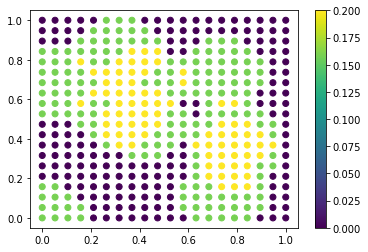

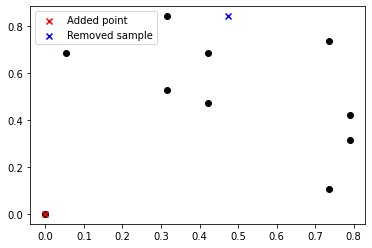

initial optimization


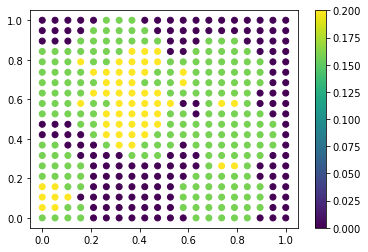

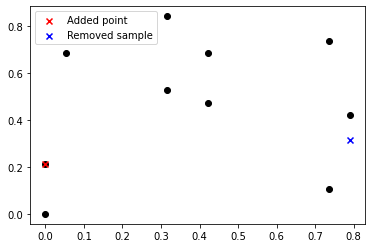

initial optimization


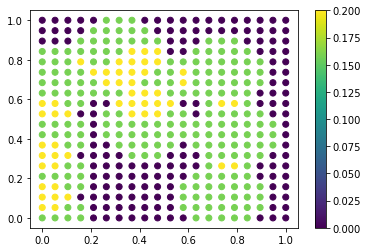

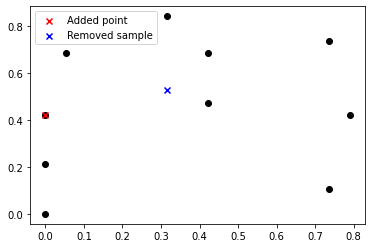

initial optimization


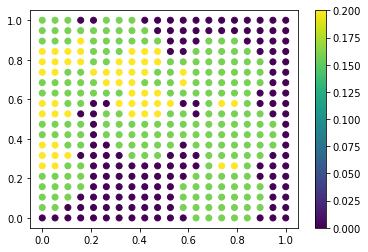

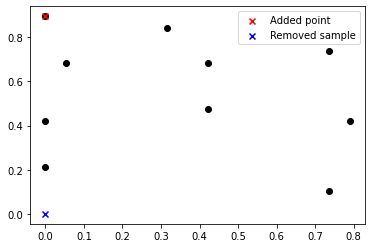

initial optimization


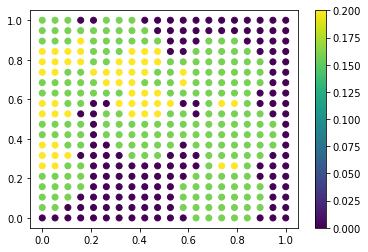

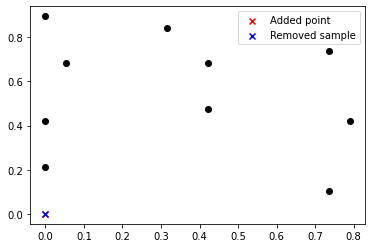

void filling


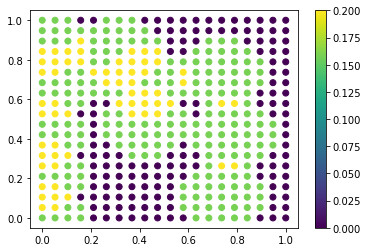

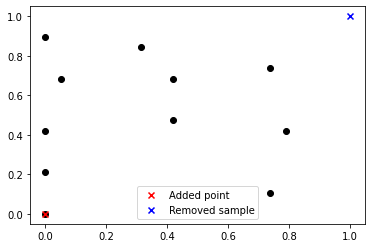

void filling


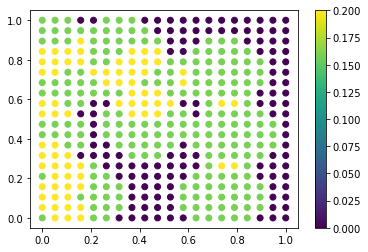

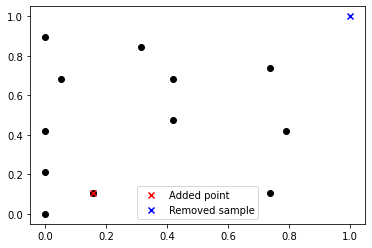

void filling


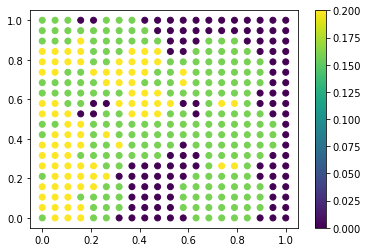

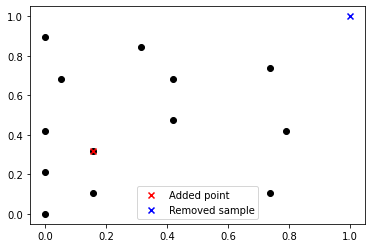

void filling


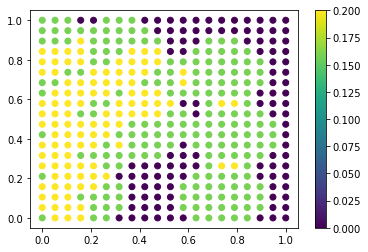

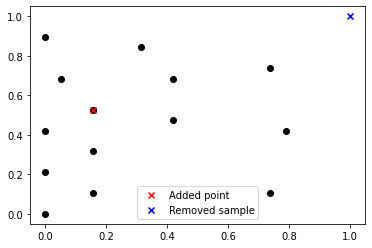

void filling


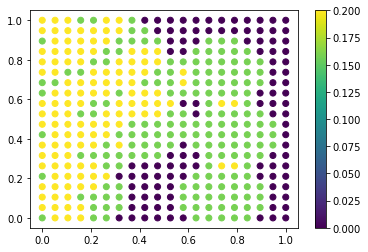

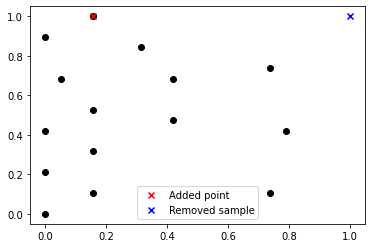

void filling


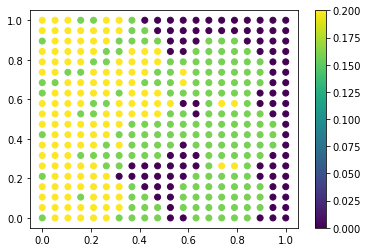

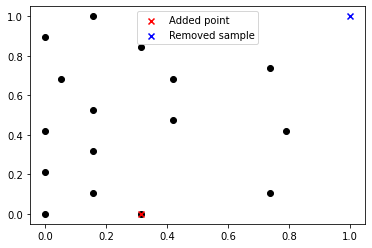

void filling


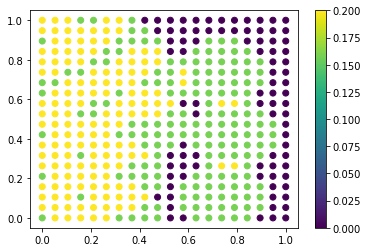

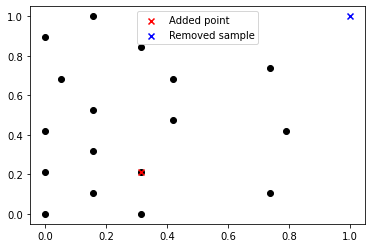

void filling


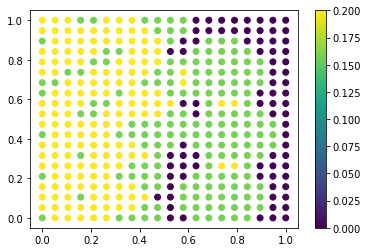

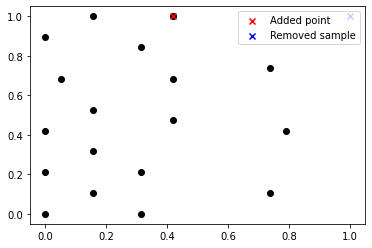

void filling


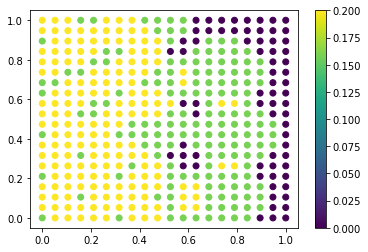

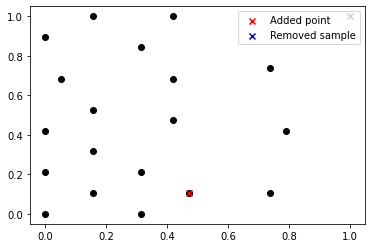

void filling


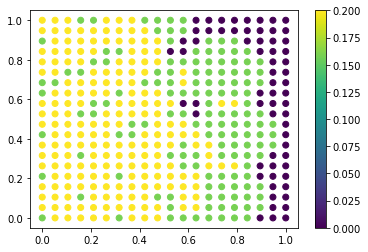

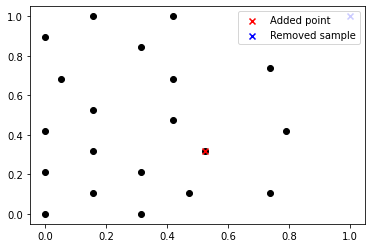

void filling


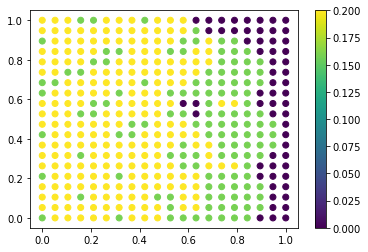

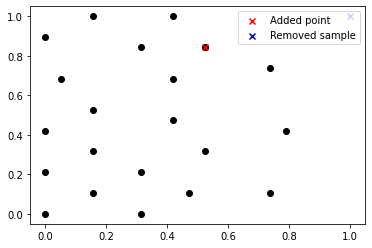

void filling


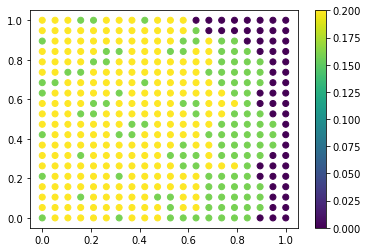

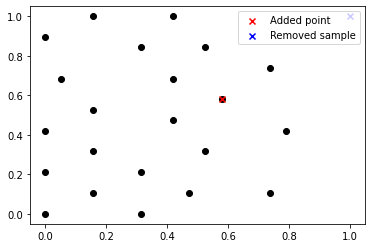

void filling


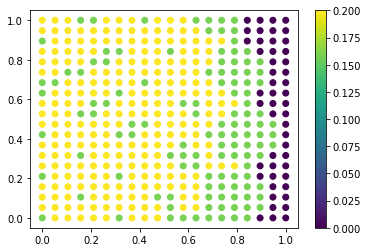

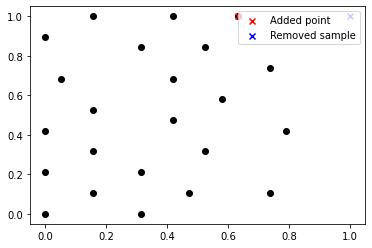

void filling


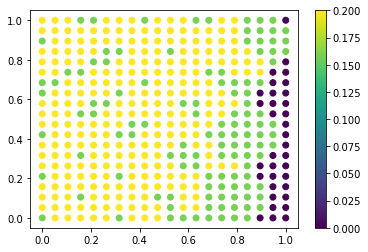

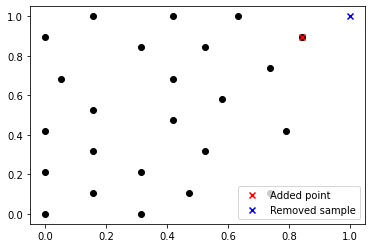

void filling


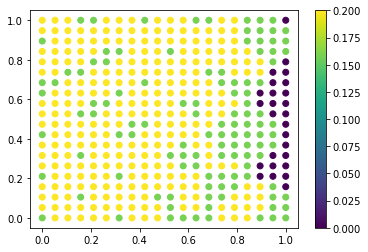

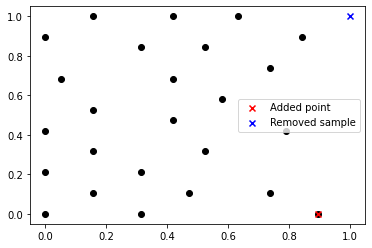

void filling


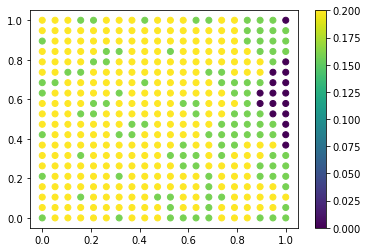

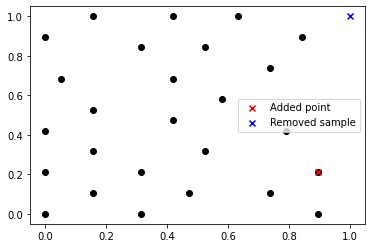

void filling


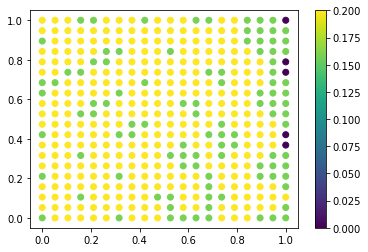

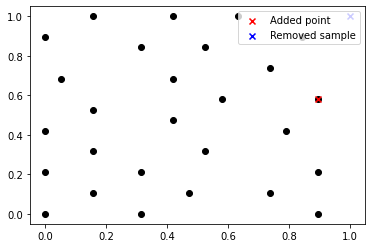

void filling


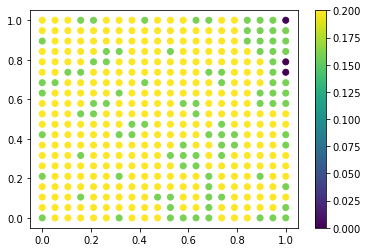

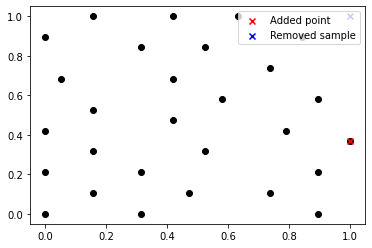

void filling


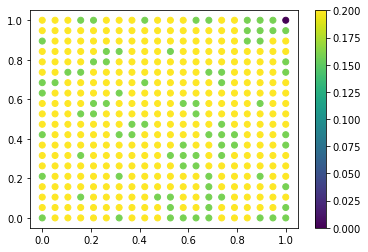

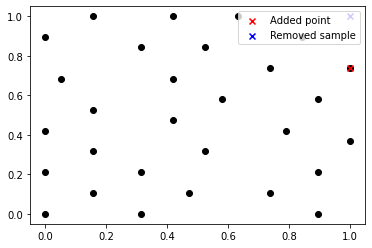

void filling


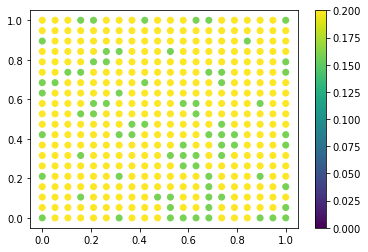

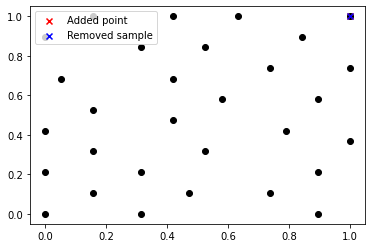

In [20]:
density_estimator = KernelDensityEstimator(points, Kernel(gaussian, scale=kernel_bandwidth))
vc = VoidAndCluster(points, density_estimator, num_initial_samples=10, log_fn=vc_log)

samples = vc.sample(size=30)

### Original point set

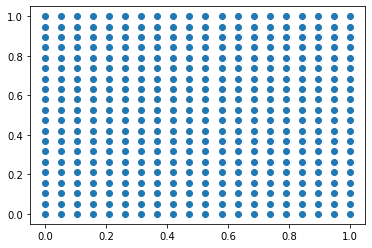

In [174]:
plt.scatter(x=points[:,0], y=points[:,1]);

### Sampled subset

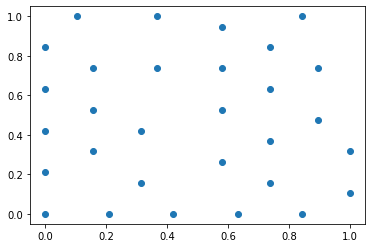

In [175]:
plt.scatter(x=samples[:,0], y=samples[:,1]);